In [2]:
%load_ext autoreload
%autoreload 2

# Activation functions

Useful links:

* https://playground.tensorflow.org
* https://www.geogebra.org/m/jmTFk4eg


### Setup


In [3]:
# If True, test is running on Colab. Otherwise, test if assumed to be offline.
TEST_ON_COLAB = False

FOLDERNAME = "Colab Notebooks/ann/3_activation-functions" # only used if TEST_ON_COLAB is True
DATASET_OPENML_ID = "spambase" # dataset to use for testing  

assert not (FOLDERNAME is None and TEST_ON_COLAB), "FOLDERNAME has to be set if TEST_ON_COLAB is True"
assert DATASET_OPENML_ID is not None, "DATASET_OPENML_ID is not set"

Set a seed for reproducibility:

In [4]:
SEED = 42

In [5]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(SEED)

### Identity activation

For $\phi$ as the identity function, the output of the perceptron is

$$
\begin{aligned}
\hat{y} & = \phi(\mathbf{w} \cdot \mathbf{x})\\
        & = \mathbf{w} \cdot \mathbf{x},
\end{aligned}
$$


With the loss function $L = (y - \hat{y})^2$, the gradient of the loss function with respect to the weights is:

$$
\begin{aligned}
\frac{\partial L}{\partial \mathbf{w}} & = -2(y - \hat{y}) \mathbf{x}.
\end{aligned}
$$

This is useful for linear regression and Widrow-Hoff learning rule with binary outputs.

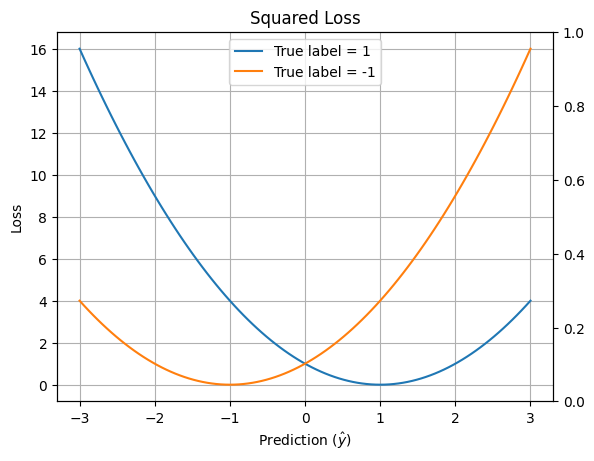

In [14]:
x = np.array([1, 2])
y_pred = np.linspace(-3, 3, 100)
loss_p1 = np.square(1 - y_pred)
loss_m1 = np.square(-1 - y_pred)

fig, ax = plt.subplots()
ax.plot(y_pred, loss_p1, label="True label = 1")
ax.plot(y_pred, loss_m1, label="True label = -1")
ax.set_xlabel("Prediction $(\hat{y})$")
ax.set_ylabel("Loss")
ax.set_title("Squared Loss")
ax.legend()
ax.grid()

ax2 = ax.twinx()


### Sigmoid activation

The sigmoid function is defined as

$$
\phi(z) = \frac{1}{1 + e^{-z}}.
$$

For a training example $(\mathbf{x}, y)$, the output of the perceptron represents the probability of the class $y = 1$ given the input $\mathbf{x}$ and is given by

$$
\hat{y} = \frac{1}{1 + e^{-\mathbf{w} \cdot \mathbf{x}}}.
$$

#### Logistic regression

The Logistic Regression, used for binary classification, is the resulting model when the sigmoid activation function is used in the perceptron. The loss function is the cross-entropy loss:

$$
L = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})].
$$


Sigmoid activation

Probability of x being in class 1: 0.8021838885585817


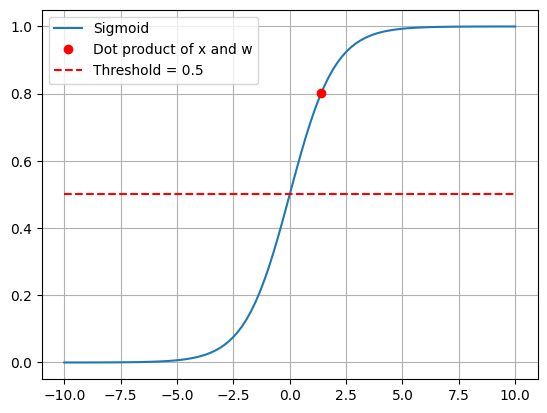

In [20]:
z = np.linspace(-10, 10, 100)
sigmoid_fn = lambda z: 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid_fn(z), label="Sigmoid")


# 3-real value
x = np.array([1, 2, 3])
w = np.array([0.1, 0.2, 0.3])
zx = np.dot(x, w)
probx = sigmoid_fn(zx)

print(f"Probability of x being in class 1: {probx}")

plt.plot(zx, probx, 'ro', label="Dot product of x and w")
plt.hlines(0.5, -10, 10, color='red', linestyle='--', label="Threshold = 0.5")
plt.grid()
plt.legend()
plt.show()

Probability of x1 being in class 1: 0.8021838885585817
Probability of x2 being in class 1: 0.9426758241011313
Probability of x3 being in class 1: 0.9852259683067269


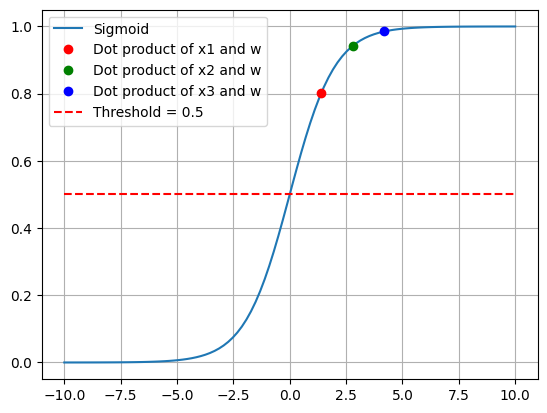

In [21]:
plt.plot(z, sigmoid_fn(z), label="Sigmoid")

# 3-real value
x1 = np.array([1, 2, 3])
x2 = 2*x1
x3 = 3*x1
w = np.array([0.1, 0.2, 0.3])
probx1 = sigmoid_fn(np.dot(x1, w))
probx2 = sigmoid_fn(np.dot(x2, w))
probx3 = sigmoid_fn(np.dot(x3, w))

print(f"Probability of x1 being in class 1: {probx1}")
print(f"Probability of x2 being in class 1: {probx2}")
print(f"Probability of x3 being in class 1: {probx3}")

plt.plot(np.dot(x1, w), probx1, 'ro', label="Dot product of x1 and w")
plt.plot(np.dot(x2, w), probx2, 'go', label="Dot product of x2 and w")
plt.plot(np.dot(x3, w), probx3, 'bo', label="Dot product of x3 and w")

plt.hlines(0.5, -10, 10, color="red", linestyle="--", label="Threshold = 0.5")
plt.grid()
plt.legend()
plt.show()

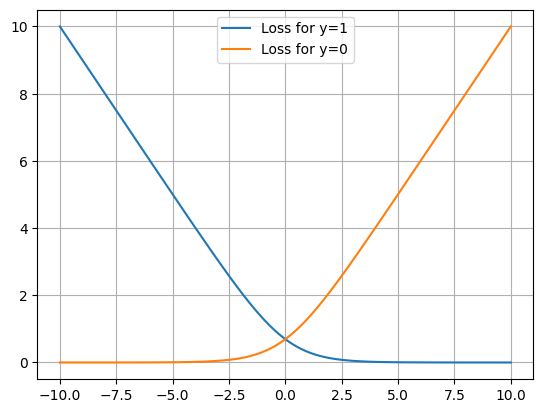

In [22]:
loss_positive = -np.log(sigmoid_fn(z))
loss_negative = -np.log(1 - sigmoid_fn(z))
plt.plot(z, loss_positive, label="Loss for y=1")
plt.plot(z, loss_negative, label="Loss for y=0")
plt.grid()
plt.legend()
plt.show()


## Optimization model

As explained in the previous section, the cross-entropy loss function for a sample $(\mathbf{x}, y)$ is

$$
L = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})].
$$

Applying the chain rule, the gradient of the loss function with respect to the weights is

$$
\begin{aligned}
\frac{\partial L}{\partial \mathbf{w}} & = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \mathbf{w}}\\
& = -\left[ y \frac{1}{\hat{y}} - (1 - y) \frac{1}{1 - \hat{y}} \right] \frac{\partial \hat{y}}{\partial \mathbf{w}}\\
& = -\left[ y \frac{1}{\hat{y}} - (1 - y) \frac{1}{1 - \hat{y}} \right] \hat{y} (1 - \hat{y}) \mathbf{x}\\
& = -\left[ y (1 - \hat{y}) - (1 - y) \hat{y} \right] \mathbf{x}\\
& = -\left[ y - y \hat{y} - \hat{y} + y \hat{y} \right] \mathbf{x}\\
& = -\left[ y - \hat{y} \right] \mathbf{x}.
\end{aligned}
$$



In [80]:
num_epochs = 10
learning_rate = 0.001

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i, x in enumerate(X_b):
        z = np.dot(x, w)
        y_pred = 1 if z > 0 else -1

        # Loss
        loss_value = max(0, -y[i] * z)
        loss_history.append(loss_value)

        # Print loss
        print(f"Iteration {iteration}: Loss {loss_value}")

        # Update weights
        w = w + learning_rate * (y[i] - y_pred) * x

        # # Alternatively, ....
        # if y[i] != y_pred:
        #     w = w + learning_rate * y[i] * x

        iteration += 1

Iteration 0: Loss 0.9693285318694361
Iteration 1: Loss 0.8545988269536527
Iteration 2: Loss 0.5137158781423407
Iteration 3: Loss 0.19802650688952983
Iteration 4: Loss 0.012859713737662815
Iteration 5: Loss 0.023090625871146297
Iteration 6: Loss 0
Iteration 7: Loss 0
Iteration 8: Loss 0
Iteration 9: Loss 0
Iteration 10: Loss 0
Iteration 11: Loss 0
Iteration 12: Loss 0.04160280685983209
Iteration 13: Loss 0
Iteration 14: Loss 0.022997224834605534
Iteration 15: Loss 0
Iteration 16: Loss 0.13529172478275464
Iteration 17: Loss 0
Iteration 18: Loss 0.0283297256496039
Iteration 19: Loss 0
Iteration 20: Loss 0
Iteration 21: Loss 0
Iteration 22: Loss 0
Iteration 23: Loss 0
Iteration 24: Loss 0.07253960505287627
Iteration 25: Loss 0
Iteration 26: Loss 0
Iteration 27: Loss 0.012563412900509663
Iteration 28: Loss 0
Iteration 29: Loss 0
Iteration 30: Loss 0.07438138763442248
Iteration 31: Loss 0
Iteration 32: Loss 0
Iteration 33: Loss 0.0439375917480459
Iteration 34: Loss 0
Iteration 35: Loss 0
Ite

Training curve:

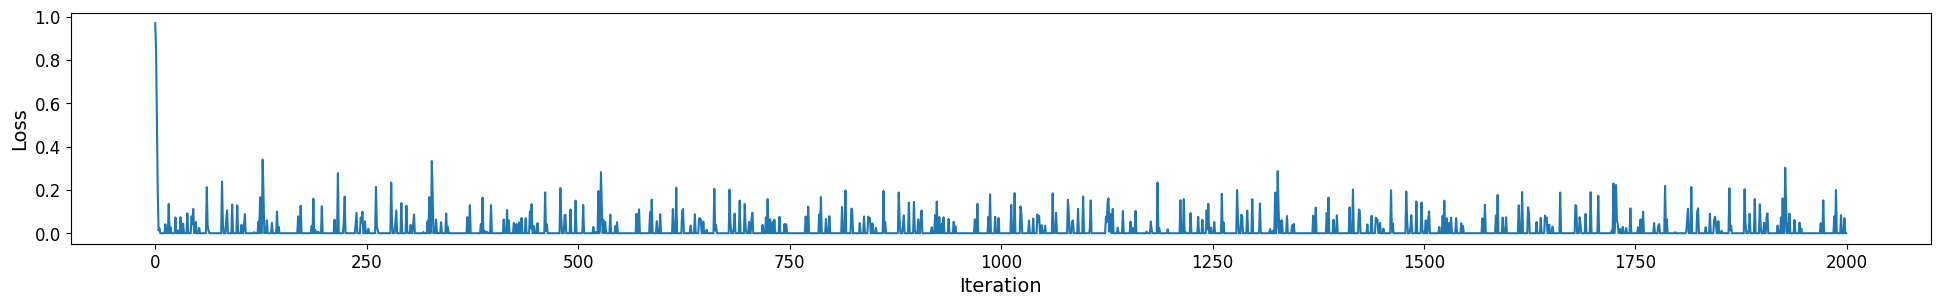

In [81]:
fig, ax = plt.subplots(figsize=(24, 3))

plt.plot(loss_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Decision boundary:

-8.255233755363747 2.037620628568785 3.624289903684095 20.54303342382


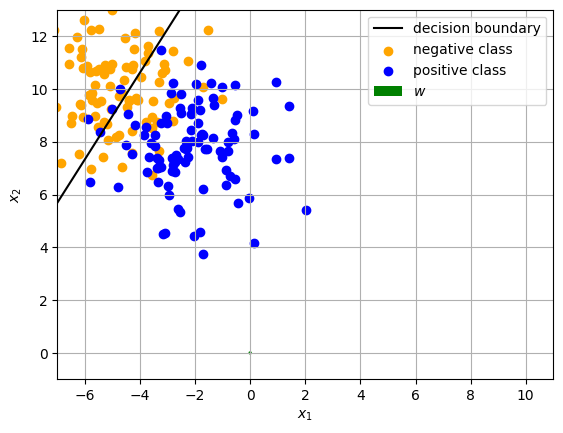

In [82]:
# plot decision boundary
x1_min = X_b[:, 0].min()
x1_max = X_b[:, 0].max()
x2_min = (-w[2] - w[0] * x1_min) / w[1]
x2_max = (-w[2] - w[0] * x1_max) / w[1]

print(x1_min, x1_max, x2_min, x2_max)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="black")  # decision boundary
plt.scatter(X_b[y == -1][:, 0], X_b[y == -1][:, 1], color="orange")  # negative class
plt.scatter(X_b[y == 1][:, 0], X_b[y == 1][:, 1], color="blue")  # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green")  # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.xlim(-7, 11)
plt.ylim(-1, 13)
# plt.axis("equal")
plt.grid(True)
plt.show()

#### Perceptron vs. Linear SVMs

Perceptron criterion:

$$ L_i = \max(0, -y_i(\mathbf{w} \cdot \mathbf{x}_i))$$

Linear SVM criterion:

$$ L_i = \max(0, 1 - y_i(\mathbf{w} \cdot \mathbf{x}_i))$$


In [83]:
num_epochs = 10
learning_rate = 0.001

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i, x in enumerate(X_b):
        z = np.dot(x, w)
        y_pred = 1 if z > 0 else -1

        # Loss
        loss_value = max(0, 1 - y[i] * z)
        loss_history.append(loss_value)

        # Print loss
        print(f"Iteration {iteration}: Loss {loss_value}")

        # Update weights
        if (1 - y[i] * z) > 0: # barely correct
            w = w + learning_rate * y[i] * x

        iteration += 1

Iteration 0: Loss 3.3292114579743046
Iteration 1: Loss 1.5544277995494036
Iteration 2: Loss 0.1705734797655728
Iteration 3: Loss 2.068742588363797
Iteration 4: Loss 0.18874076336300372
Iteration 5: Loss 1.8818648609525894
Iteration 6: Loss 5.357789998279781
Iteration 7: Loss 0
Iteration 8: Loss 2.8692322176411045
Iteration 9: Loss 6.2058727037856345
Iteration 10: Loss 1.8186825198398278
Iteration 11: Loss 0
Iteration 12: Loss 2.3175293768118013
Iteration 13: Loss 1.6606778991183366
Iteration 14: Loss 1.4997037501674129
Iteration 15: Loss 2.9798569923800873
Iteration 16: Loss 0
Iteration 17: Loss 5.189873986265257
Iteration 18: Loss 3.3155645937866
Iteration 19: Loss 4.029832363504025
Iteration 20: Loss 4.819149453205391
Iteration 21: Loss 2.8960594881264905
Iteration 22: Loss 6.135142747980063
Iteration 23: Loss 0.8867841587767313
Iteration 24: Loss 0.4492411089031142
Iteration 25: Loss 3.1465736822820536
Iteration 26: Loss 1.25637002227308
Iteration 27: Loss 1.9610260331482308
Iterati

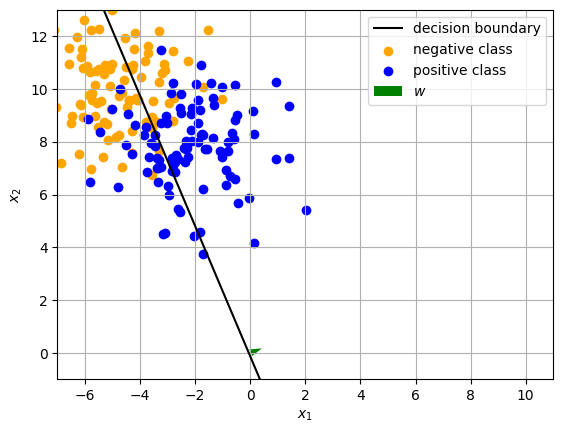

In [84]:
# plot decision boundary
x1_min = X_b[:, 0].min()
x1_max = X_b[:, 0].max()
x2_min = (-w[2] - w[0] * x1_min) / w[1]
x2_max = (-w[2] - w[0] * x1_max) / w[1]

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="black")  # decision boundary
plt.scatter(X_b[y == -1][:, 0], X_b[y == -1][:, 1], color="orange")  # negative class
plt.scatter(X_b[y == 1][:, 0], X_b[y == 1][:, 1], color="blue")  # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green") # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.xlim(-7, 11)
plt.ylim(-1, 13)
# plt.axis("equal")
plt.grid(True)
plt.show()

## Case study: SPAM detection

In [85]:
# Create dataset directory

import os

if TEST_ON_COLAB:
    # This mounts your Google Drive to the Colab VM.
    from google.colab import drive

    drive.mount('/content/drive')
    cache_dir = f"/content/drive/My Drive/{FOLDERNAME}/dataset/{DATASET_OPENML_ID}"
else:
    cache_dir =  f"dataset/{DATASET_OPENML_ID}"

os.makedirs(cache_dir, exist_ok=True)

Fetching the SPAMBASE dataset.

In [86]:
from sklearn.datasets import fetch_openml
import numpy as np

X_file_path = f"{cache_dir}/X.npy"
y_file_path = f"{cache_dir}/y.npy"

# Check if the dataset files already exist
if not (os.path.exists(X_file_path) and os.path.exists(y_file_path)):
    # Download the SPAMBASE dataset
    X, y = fetch_openml(DATASET_OPENML_ID, as_frame=False, cache=True, return_X_y=True)
    
    # Save the dataset as numpy arrays
    np.save(X_file_path, X.astype(np.float32))
    np.save(y_file_path, y.astype(np.float32))
    print(f"SPAMBASE dataset downloaded and saved successfully to {cache_dir}.")
else:
    X = np.load(X_file_path, allow_pickle=True)
    y = np.load(y_file_path, allow_pickle=True)
    print(f"SPAMBASE dataset already exists in {cache_dir}. Skipping download.")

print(X.shape)
print(X.min(), X.max())

SPAMBASE dataset already exists in dataset/spambase. Skipping download.
(4601, 57)
0.0 15841.0


Splitting the dataset into training, validation and test sets.

In [87]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(SEED)

# Split the data into train and test sets
y[y==0] = -1 # convert 0 labels to -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Train set size: 3680
Test set size: 921


#### Implementation of a class Perceptron

In [88]:
class Perceptron:
    def __init__(self, num_epochs=10, learning_rate=1e-03, include_bias=True):
        """ Initialize the perceptron model.
        
        Args:
            num_epochs (int): Number of epochs to train the model.
        """
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.w = None
        self.include_bias = include_bias

    def fit(self, X, y):
        """ Fit the perceptron model.
        
        Args:
            X (ndarray): Input data of shape (num_samples, num_features).
            y (ndarray): Target labels of shape (num_samples,).
        """
        
        # Add bias term
        if self.include_bias:
            X = np.hstack([X, np.ones((X.shape[0], 1))])
        
        # Random weights initialization
        self.w = np.random.normal(size=X.shape[1])

        for epoch in range(self.num_epochs):
            for i, x in enumerate(X):
                z = np.dot(x, self.w)
                y_pred = 1 if z > 0 else -1
                self.w = self.w + self.learning_rate * (y[i] - y_pred) * x
        
        return self
    
    def predict(self, X):
        """ Predict the target labels.
        
        Args:
            X (ndarray): Input data of shape (num_samples, num_features).
        
        Returns:
            ndarray: Predicted target labels of shape (num_samples,).
        """
        
        if self.include_bias:
            X = np.hstack([X, np.ones((X.shape[0], 1))])
        
        return np.array([1 if np.dot(x, self.w) > 0 else -1 for x in X])

#### Training the Perceptron

In [89]:
model = Perceptron(num_epochs=50, learning_rate=1e-02)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Classification report

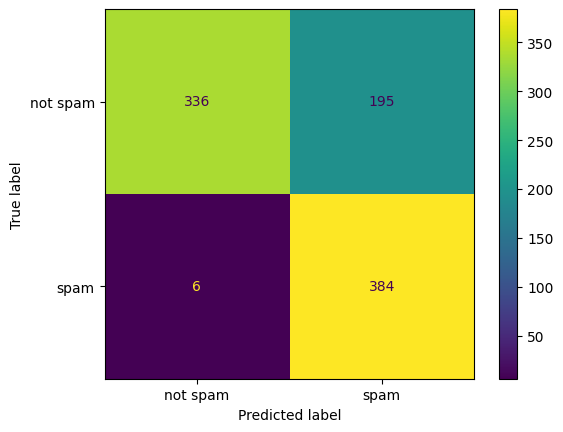


Classification Report:
              precision    recall  f1-score   support

    not spam       0.98      0.63      0.77       531
        spam       0.66      0.98      0.79       390

    accuracy                           0.78       921
   macro avg       0.82      0.81      0.78       921
weighted avg       0.85      0.78      0.78       921



In [90]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["not spam", "spam"])
disp.plot()
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred, target_names=["not spam", "spam"])

print("\nClassification Report:")
print(class_report)